In [112]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.datasets import *
style.use('ggplot')
%matplotlib inline

In [121]:


class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    def refresh_plot(self):
        plt.cla()
        plt.clf()
        
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    def set_w_b(self, i):
        norms = sorted([n for n in self.opt_dict])
            #print(norms)
            #||w|| : [w,b]
            #if(len(norms)>0):
        opt_choice = self.opt_dict[norms[i]]
        self.w = opt_choice[0]
        self.b = opt_choice[1]
            
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        self.opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            
            while not optimized:
                
                # adjust b
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    
                    # W with same magnitude can be in 4 different directions
                    # check for each
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    break
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            self.opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in self.opt_dict])
            #print(norms)
            #||w|| : [w,b]
            #if(len(norms)>0):
            opt_choice = self.opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
        """   
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            
        """
    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
    
    def show_support_vectors(self):
        eps = 0.05
        support_vectors = []
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                if yi*(np.dot(self.w,xi)+self.b) < 1+eps and yi*(np.dot(self.w,xi)+self.b) > 1-eps:
                    support_vectors.append(xi)        
        
        for point in support_vectors:
            self.ax.scatter(point[0], point[1], s=200, marker='s', c='black')

    def visualize(self):
        self.show_support_vectors()
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        """
        eps = 0.05
        support_vectors = []
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                if yi*(np.dot(self.w,xi)+self.b) < 1+eps and yi*(np.dot(self.w,xi)+self.b) > 1-eps:
                    found_option = False
                    break
        """
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        #print("call")
        plt.show()
        


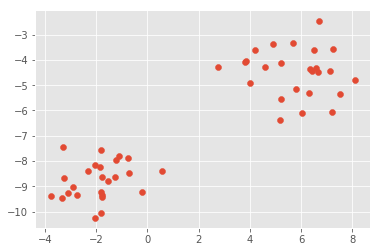

In [122]:
original_X, y = make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
#make_blobs
pos_examples = []
neg_examples = []
for out,point in zip(original_X, y):
    if point == 0:
        neg_examples.append(out)
    else:
        pos_examples.append(out)

a= np.array(pos_examples)
b = np.array(neg_examples)


data_dict2 = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}
                         

data_dict = {-1:b,1:a}
data_dict2

plt.scatter([x[0] for x in original_X],[x[1] for x in original_X])


Optimized a step.
Optimized a step.
Optimized a step.


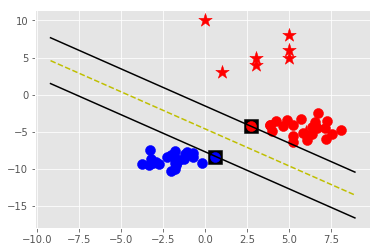

In [123]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)
#svm.set_w_b(2)
svm.visualize()


<Figure size 432x288 with 0 Axes>

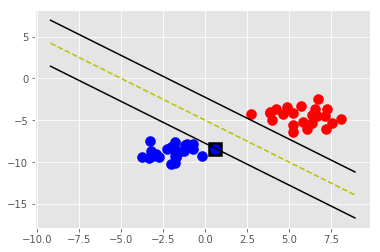

In [124]:
svm.set_w_b(5)
svm.refresh_plot()
svm.visualize()


In [126]:
svm.set_w_b(1)
svm.refresh_plot()
svm.visualize()

IndexError: list index out of range